In [ ]:
pip install scikit-learn==1.2.2

In [ ]:
!pip install category encoders

import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce
# import dtale
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import timeit
import xgboost as xgb

from imblearn.over_sampling import RandomOverSampler
from numba import jit, cuda
# from pandas_profiling import ProfileReport
# from pycaret.classification import *
# from pycaret.regression import *
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from wordcloud import WordCloud

sns.set()
%matplotlib inline

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
!unzip -q "/content/drive/MyDrive/archive.zip"

In [ ]:
df = pd.read_csv("IMDb Movies India.csv", encoding = 'latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.duplicated().sum()

6

In [ ]:
rest_df, test_df = [x for y, x in movies_df.groupby(movies_df['Rating'].isna())]

In [ ]:
test_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,(1990),NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN


In [ ]:
rest_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
train_df, validation_df = train_test_split(rest_df, train_size = 0.8, random_state = 101)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3609,Des Pardes,(1978),NaN,"Drama, Family",7.1,151,Dev Anand,Dev Anand,Ajit,Pran
11828,Rebellious Flower,(2016),110 min,"Biography, Drama",6.8,241,Krishan Hooda,Prince Shah,Shashank Singh,Mantra Mugdh


In [ ]:
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,(2018),104 min,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,(1998),126 min,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
validation_df.duplicated().sum()

0

In [ ]:
test_df.duplicated().sum()

6

In [ ]:
test_df[movies_df.duplicated(keep = False)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1249,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1768,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4722,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
4723,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9712,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13068,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13069,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN


In [ ]:
test_df.drop_duplicates(inplace = True)
test_df.duplicated().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 3609 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6335 non-null   object 
 1   Year      6335 non-null   object 
 2   Duration  4682 non-null   object 
 3   Genre     6250 non-null   object 
 4   Rating    6335 non-null   float64
 5   Votes     6335 non-null   object 
 6   Director  6331 non-null   object 
 7   Actor 1   6226 non-null   object 
 8   Actor 2   6168 non-null   object 
 9   Actor 3   6093 non-null   object 
dtypes: float64(1), object(9)
memory usage: 544.4+ KB


In [ ]:
train_df.describe()

,Rating
count,6335.000000
mean,5.855801
std,1.388427
min,1.100000
25%,4.900000
50%,6.000000
75%,6.900000
max,9.700000


In [ ]:
train_df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,6335,6335,4682,6250,6335.000000,6335,6331,6226,6168,6093
unique,5972,92,174,391,NaN,1723,2732,2196,2480,2657
top,Sanjog,(2019),120 min,Drama,NaN,7,Mahesh Bhatt,Dharmendra,Rekha,Pran
freq,4,204,143,972,NaN,183,40,113,59,61
mean,NaN,NaN,NaN,NaN,5.855801,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.388427,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 12679 to 12305
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1584 non-null   object 
 1   Year      1584 non-null   object 
 2   Duration  1169 non-null   object 
 3   Genre     1567 non-null   object 
 4   Rating    1584 non-null   float64
 5   Votes     1584 non-null   object 
 6   Director  1583 non-null   object 
 7   Actor 1   1568 non-null   object 
 8   Actor 2   1551 non-null   object 
 9   Actor 3   1534 non-null   object 
dtypes: float64(1), object(9)
memory usage: 136.1+ KB


In [ ]:
validation_df.describe()

,Rating
count,1584.000000
mean,5.784912
std,1.353802
min,1.600000
25%,4.900000
50%,5.900000
75%,6.800000
max,10.000000


In [ ]:
validation_df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,1584,1584,1169,1567,1584.000000,1584,1583,1568,1551,1534
unique,1566,89,133,217,NaN,629,1017,782,913,942
top,Badal,(2015),135 min,Drama,NaN,9,Shantaram Rajaram Vankudre,Jeetendra,Rekha,Raj Babbar
freq,2,47,39,205,NaN,54,10,34,20,16
mean,NaN,NaN,NaN,NaN,5.784912,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.353802,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.900000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7057 non-null   object 
 2   Duration  1388 non-null   object 
 3   Genre     5810 non-null   object 
 4   Rating    0 non-null      float64
 5   Votes     1 non-null      object 
 6   Director  7065 non-null   object 
 7   Actor 1   6094 non-null   object 
 8   Actor 2   5403 non-null   object 
 9   Actor 3   4736 non-null   object 
dtypes: float64(1), object(9)
memory usage: 651.8+ KB


In [ ]:
train_missing = list(train_df.isnull().sum())
val_missing = list(validation_df.isnull().sum())
test_misisng = list(test_df.isnull().sum())

In [ ]:
train_missing_percent = list(train_df.isnull().sum() / len(train_df) * 100)
val_missing_percent = list(validation_df.isnull().sum() / len(validation_df) * 100)
test_misisng_percent = list(test_df.isnull().sum() / len(test_df) * 100)

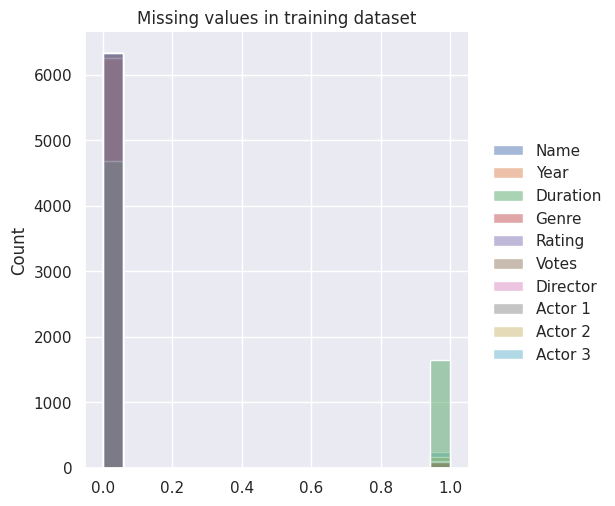

In [ ]:
sns.displot(train_df.isnull())
plt.title("Missing values in training dataset")
plt.show()

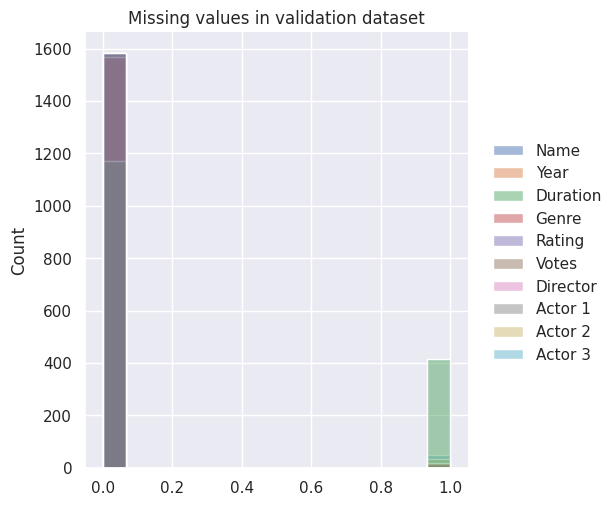

In [ ]:
sns.displot(validation_df.isnull())
plt.title("Missing values in validation dataset")
plt.show()

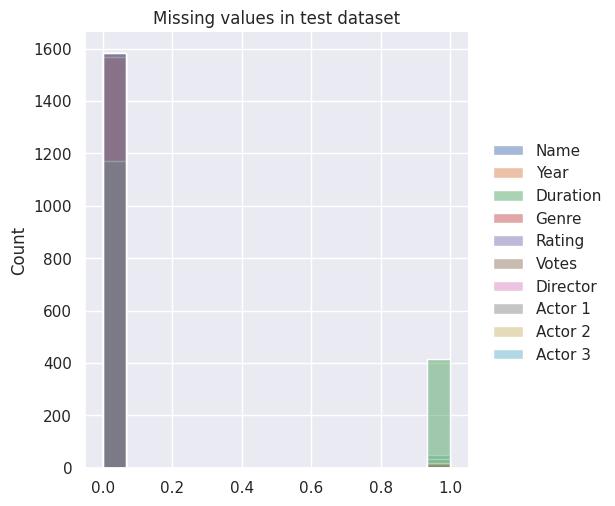

In [ ]:
sns.displot(validation_df.isnull())
plt.title("Missing values in test dataset")
plt.show()

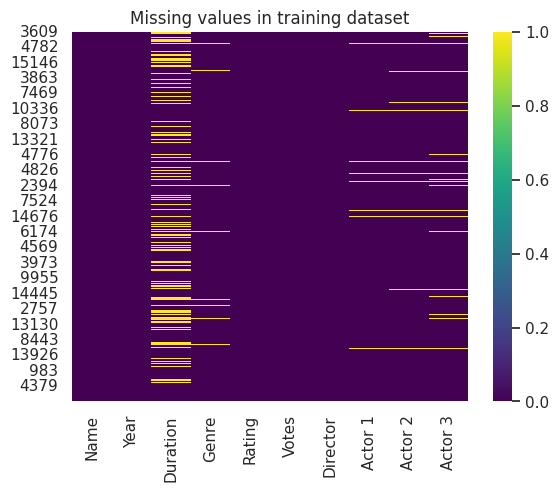

In [ ]:
sns.heatmap(train_df.isnull(), cmap = 'viridis')
plt.title("Missing values in training dataset")
plt.show()

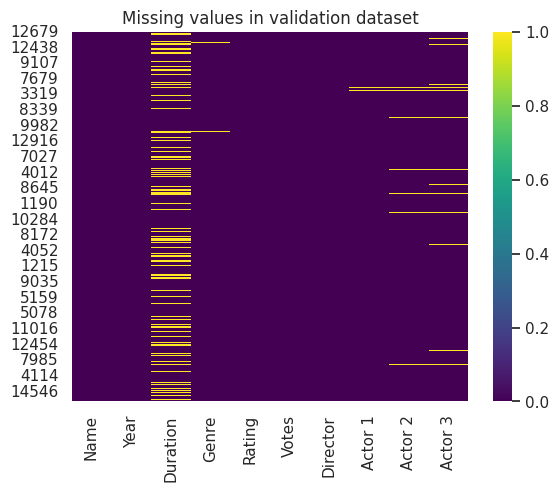

In [ ]:
sns.heatmap(validation_df.isnull(), cmap = 'viridis')
plt.title("Missing values in validation dataset")
plt.show()

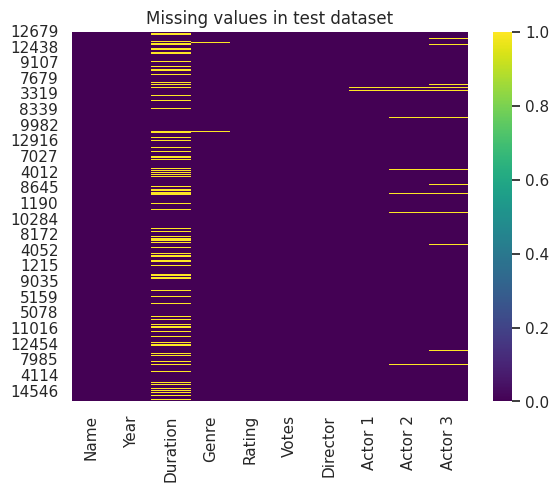

In [ ]:
sns.heatmap(validation_df.isnull(), cmap = 'viridis')
plt.title("Missing values in test dataset")
plt.show()

In [ ]:
missing_df = pd.DataFrame({'Columns' : list(train_df.columns), 'Train_missing' : train_missing, 'Percent_Train_missing' : train_missing_percent,
                'Validation_missing' : val_missing, 'Percent_Val_missing' : val_missing_percent, 'Test_missing' : test_misisng,
                           'Percent_Test_missing' : test_misisng_percent})
missing_df

,Columns,Train_missing,Percent_Train_missing,Validation_missing,Percent_Val_missing,Test_missing,Percent_Test_missing
0,Name,0,0.000000,0,0.000000,0,0.000000
1,Year,0,0.000000,0,0.000000,527,6.948840
2,Duration,1653,26.093133,415,26.199495,6196,81.698312
3,Genre,85,1.341752,17,1.073232,1774,23.391350
4,Rating,0,0.000000,0,0.000000,7584,100.000000
5,Votes,0,0.000000,0,0.000000,7583,99.986814
6,Director,4,0.063141,1,0.063131,519,6.843354
7,Actor 1,109,1.720600,16,1.010101,1490,19.646624
8,Actor 2,167,2.636148,33,2.083333,2181,28.757911
9,Actor 3,242,3.820047,50,3.156566,2848,37.552743


In [ ]:
train_df['Year'] = train_df['Year'].str.extract('([0-9]+)').astype(int)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3609,Des Pardes,1978,NaN,"Drama, Family",7.1,151,Dev Anand,Dev Anand,Ajit,Pran
11828,Rebellious Flower,2016,110 min,"Biography, Drama",6.8,241,Krishan Hooda,Prince Shah,Shashank Singh,Mantra Mugdh


In [ ]:
validation_df['Year'] = validation_df['Year'].str.extract('([0-9]+)').astype(int)
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,2018,104 min,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,1998,126 min,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [ ]:
test_df['Year'] = test_df['Year'].str.replace(r'[()]', '', regex=True)
test_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


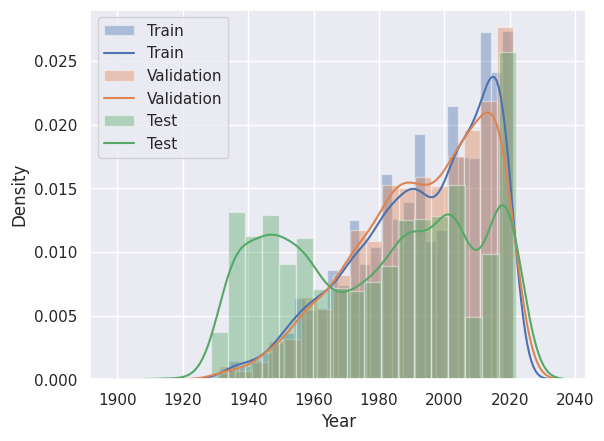

In [ ]:
sns.distplot(train_df['Year'].values, label = "Train")
sns.distplot(validation_df['Year'].values, label = "Validation")
sns.distplot(test_df['Year'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Year')

plt.show()

In [ ]:
mode_year = train_df['Year'].mode()
test_df['Year'] = test_df['Year'].fillna(2019)

In [ ]:
test_df['Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7584 entries, 0 to 15507
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
7584 non-null   object
dtypes: object(1)
memory usage: 118.5+ KB


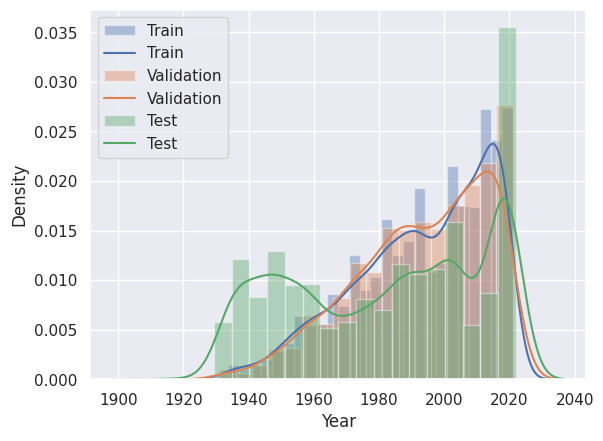

In [ ]:
sns.distplot(train_df['Year'].values, label = "Train")
sns.distplot(validation_df['Year'].values, label = "Validation")
sns.distplot(test_df['Year'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Year')

plt.show()

In [ ]:
train_df['Duration'] = train_df['Duration'].str.extract('([0-9]+)').astype(float)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3609,Des Pardes,1978,NaN,"Drama, Family",7.1,151,Dev Anand,Dev Anand,Ajit,Pran
11828,Rebellious Flower,2016,110.0,"Biography, Drama",6.8,241,Krishan Hooda,Prince Shah,Shashank Singh,Mantra Mugdh


In [ ]:
validation_df['Duration'] = validation_df['Duration'].str.extract('([0-9]+)').astype(float)
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,2018,104.0,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,1998,126.0,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [ ]:
test_df['Duration'] = test_df['Duration'].str.extract('([0-9]+)').astype(float)
test_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


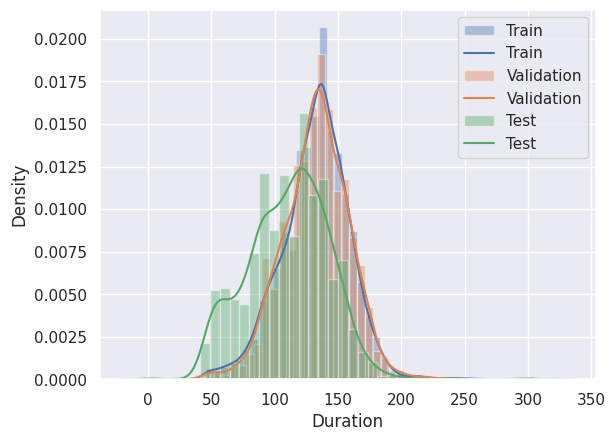

In [ ]:
sns.distplot(train_df['Duration'].values, label = "Duration")
sns.distplot(validation_df['Duration'].values, label = "Validation")
sns.distplot(test_df['Duration'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Duration')

plt.show()

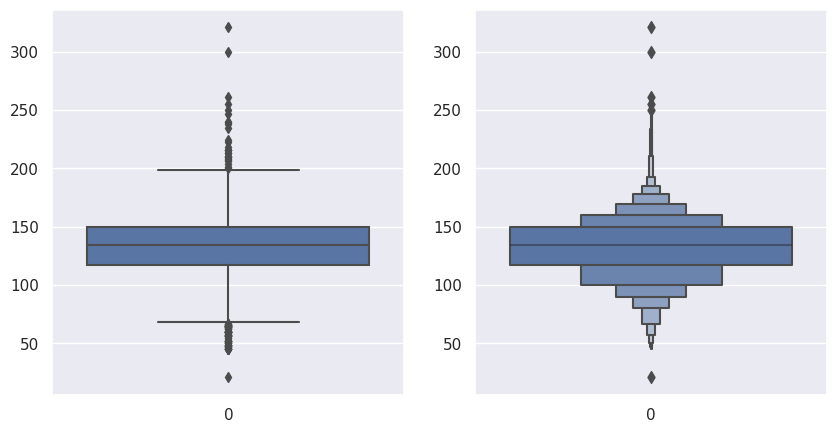

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(train_df['Duration'].values)

plt.subplot(1, 2, 2)
sns.boxenplot(train_df['Duration'].values)

plt.show()

In [ ]:
median_duration = train_df['Duration'].median()

train_df['Duration'] = train_df['Duration'].fillna(median_duration)
validation_df['Duration'] = validation_df['Duration'].fillna(median_duration)
test_df['Duration'] = test_df['Duration'].fillna(median_duration)

train_df['Duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6335 entries, 3609 to 9574
Series name: Duration
Non-Null Count  Dtype  
--------------  -----  
6335 non-null   float64
dtypes: float64(1)
memory usage: 99.0 KB


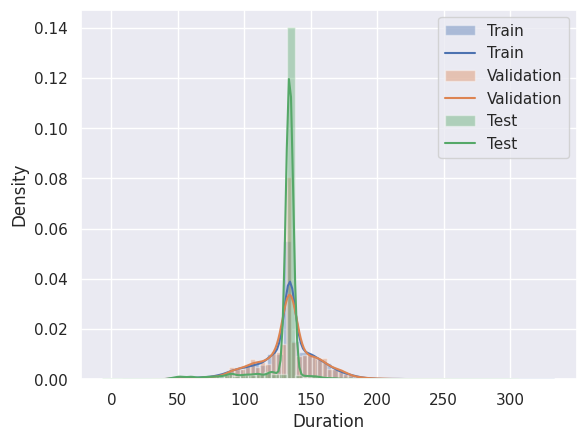

In [ ]:
sns.distplot(train_df['Duration'].values, label = "Duration")
sns.distplot(validation_df['Duration'].values, label = "Validation")
sns.distplot(test_df['Duration'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Duration')

plt.show()

In [ ]:
def expand_genre(df):
    genres_df = df['Genre'].str.split(', ', expand = True)
    df = pd.concat([df, genres_df], axis = 1)
    df.rename(columns = {0 : 'Genre_1', 1 : 'Genre_2', 2 : 'Genre_3'}, inplace = True)
    df.drop('Genre', axis = 1, inplace = True)
    return df

In [ ]:
train_df = expand_genre(train_df)
validation_df = expand_genre(validation_df)
test_df = expand_genre(test_df)

In [ ]:
print("Train Genre_1 missing :", (train_df['Genre_1'].isnull().sum() / len(train_df['Genre_1']) * 100))
print("Train Genre_2 missing :", (train_df['Genre_2'].isnull().sum() / len(train_df['Genre_2']) * 100))
print("Train Genre_3 missing :", (train_df['Genre_3'].isnull().sum() / len(train_df['Genre_3']) * 100))
print("Validation Genre_1 missing :", (validation_df['Genre_1'].isnull().sum() / len(validation_df['Genre_1']) * 100))
print("Validation Genre_2 missing :", (validation_df['Genre_2'].isnull().sum() / len(validation_df['Genre_2']) * 100))
print("Validation Genre_3 missing :", (validation_df['Genre_3'].isnull().sum() / len(validation_df['Genre_3']) * 100))
print("Test Genre_1 missing :", (test_df['Genre_1'].isnull().sum() / len(test_df['Genre_1']) * 100))
print("Test Genre_2 missing :", (test_df['Genre_2'].isnull().sum() / len(test_df['Genre_2']) * 100))
print("Test Genre_3 missing :", (test_df['Genre_3'].isnull().sum() / len(test_df['Genre_3']) * 100))

Train Genre_1 missing : 1.3417521704814523
Train Genre_2 missing : 35.84846093133386
Train Genre_3 missing : 64.64088397790056
Validation Genre_1 missing : 1.073232323232323
Validation Genre_2 missing : 34.217171717171716
Validation Genre_3 missing : 63.888888888888886
Test Genre_1 missing : 23.39135021097046
Test Genre_2 missing : 85.5617088607595
Test Genre_3 missing : 94.35654008438819


In [ ]:
def drop_genre(df):
    df.drop(['Genre_2','Genre_3'], axis = 1, inplace = True)
    df.rename(columns = {'Genre_1' : 'Genre'}, inplace = True)
    return df

train_df = drop_genre(train_df)
validation_df = drop_genre(validation_df)
test_df = drop_genre(test_df)

In [ ]:
mode_per_year = train_df.groupby('Year')['Genre'].apply(lambda x: x.mode().iloc[0])    # Gives a df with node of each year
train_df['Genre'] = train_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 3609 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6335 non-null   object 
 1   Year      6335 non-null   int64  
 2   Duration  6335 non-null   float64
 3   Rating    6335 non-null   float64
 4   Votes     6335 non-null   object 
 5   Director  6331 non-null   object 
 6   Actor 1   6226 non-null   object 
 7   Actor 2   6168 non-null   object 
 8   Actor 3   6093 non-null   object 
 9   Genre     6335 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 544.4+ KB


In [ ]:
validation_df['Genre'] = validation_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 12679 to 12305
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1584 non-null   object 
 1   Year      1584 non-null   int64  
 2   Duration  1584 non-null   float64
 3   Rating    1584 non-null   float64
 4   Votes     1584 non-null   object 
 5   Director  1583 non-null   object 
 6   Actor 1   1568 non-null   object 
 7   Actor 2   1551 non-null   object 
 8   Actor 3   1534 non-null   object 
 9   Genre     1584 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 136.1+ KB


In [ ]:
genre_mode = train_df['Genre'].mode()
genre_mode

0    Drama
Name: Genre, dtype: object

In [ ]:
test_df['Genre'] = test_df['Genre'].fillna('Drama')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7584 non-null   object 
 2   Duration  7584 non-null   float64
 3   Rating    0 non-null      float64
 4   Votes     1 non-null      object 
 5   Director  7065 non-null   object 
 6   Actor 1   6094 non-null   object 
 7   Actor 2   5403 non-null   object 
 8   Actor 3   4736 non-null   object 
 9   Genre     7584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 651.8+ KB


In [ ]:
set(test_df['Votes'].tolist())

{'$5.16M', nan}

In [ ]:
test_df.index[test_df['Votes'] == '$5.11M']

Int64Index([], dtype='int64')

In [ ]:
test_df['Votes'][9500] = pd.NA

In [ ]:
def fill_names(df):
    df['Director'] = df['Director'].fillna('Not Available')
    df['Actor 1'] = df['Actor 1'].fillna('Not Available')
    df['Actor 2'] = df['Actor 2'].fillna('Not Available')
    df['Actor 3'] = df['Actor 3'].fillna('Not Available')
    return df

train_df = fill_names(train_df)
validation_df = fill_names(validation_df)
test_df = fill_names(test_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 3609 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6335 non-null   object 
 1   Year      6335 non-null   int64  
 2   Duration  6335 non-null   float64
 3   Rating    6335 non-null   float64
 4   Votes     6335 non-null   object 
 5   Director  6335 non-null   object 
 6   Actor 1   6335 non-null   object 
 7   Actor 2   6335 non-null   object 
 8   Actor 3   6335 non-null   object 
 9   Genre     6335 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 544.4+ KB


In [ ]:
train_missing = list(train_df.isnull().sum())
val_missing = list(validation_df.isnull().sum())
test_misisng = list(test_df.isnull().sum())

train_missing_percent = list(train_df.isnull().sum() / len(train_df) * 100)
val_missing_percent = list(validation_df.isnull().sum() / len(validation_df) * 100)
test_misisng_percent = list(test_df.isnull().sum() / len(test_df) * 100)

missing_df = pd.DataFrame({'Columns' : list(train_df.columns), 'Train_missing' : train_missing, 'Percent_Train_missing' : train_missing_percent,
                'Validation_missing' : val_missing, 'Percent_Val_missing' : val_missing_percent, 'Test_missing' : test_misisng,
                           'Percent_Test_missing' : test_misisng_percent})
missing_df

,Columns,Train_missing,Percent_Train_missing,Validation_missing,Percent_Val_missing,Test_missing,Percent_Test_missing
0,Name,0,0.0,0,0.0,0,0.0
1,Year,0,0.0,0,0.0,0,0.0
2,Duration,0,0.0,0,0.0,0,0.0
3,Rating,0,0.0,0,0.0,7584,100.0
4,Votes,0,0.0,0,0.0,7584,100.0
5,Director,0,0.0,0,0.0,0,0.0
6,Actor 1,0,0.0,0,0.0,0,0.0
7,Actor 2,0,0.0,0,0.0,0,0.0
8,Actor 3,0,0.0,0,0.0,0,0.0
9,Genre,0,0.0,0,0.0,0,0.0


In [ ]:
filled_df = pd.concat([train_df, validation_df], axis = 0)
filled_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
3609,Des Pardes,1978,134.0,7.1,151,Dev Anand,Dev Anand,Ajit,Pran,Drama
11828,Rebellious Flower,2016,110.0,6.8,241,Krishan Hooda,Prince Shah,Shashank Singh,Mantra Mugdh,Biography


In [ ]:
filled_df['Votes'] = filled_df['Votes'].str.replace(',','').astype(int)
train_df['Votes'] = train_df['Votes'].str.replace(',','').astype(int)
validation_df['Votes'] = validation_df['Votes'].str.replace(',','').astype(int)

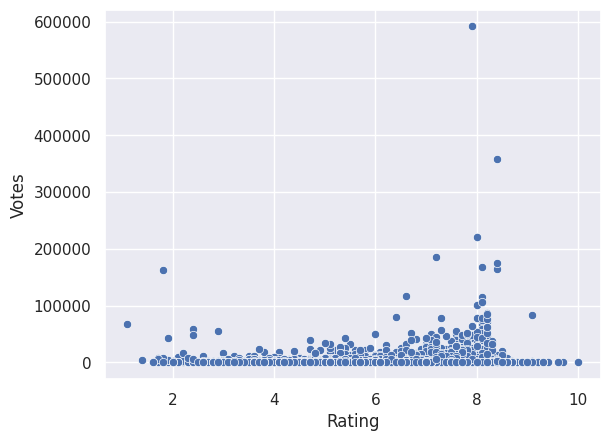

In [ ]:
sns.scatterplot(x = filled_df['Rating'], y = filled_df['Votes'])
plt.show()

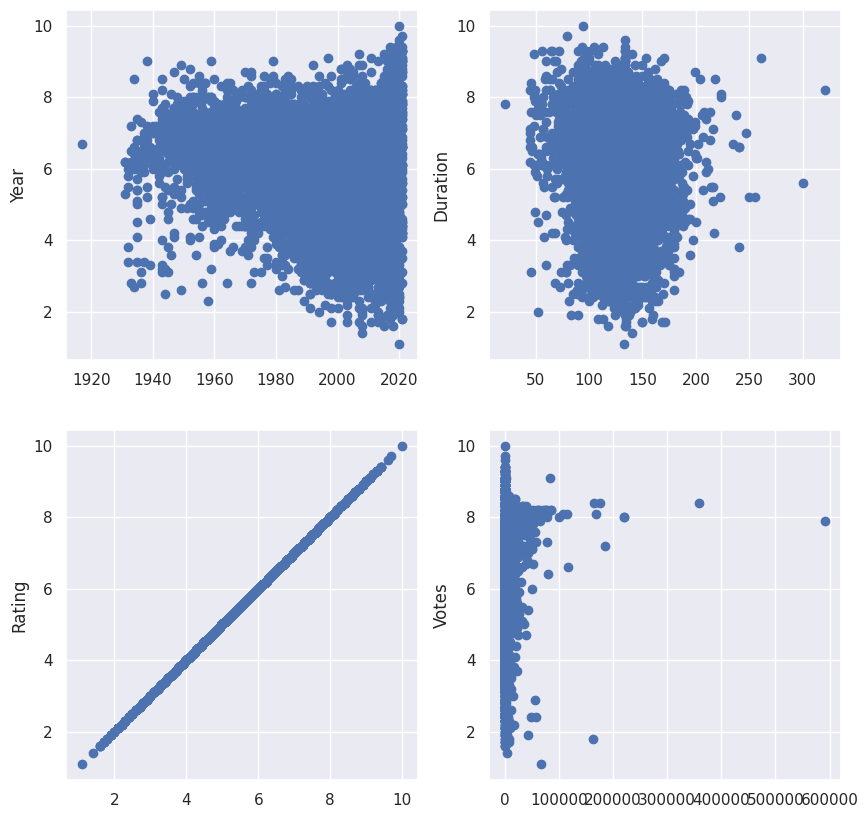

In [ ]:
numeric_cols = filled_df.select_dtypes(include = np.number)
col_names = list(numeric_cols.columns)
col_index = 0
plt_rows = 2
plt_cols = 2

fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (10, 10))

for row_count in range(plt_rows):
    for col_count in range(plt_cols):
        ax[row_count][col_count].scatter(x = filled_df[col_names[col_index]], y = filled_df['Rating'], c = ['b'])
        ax[row_count][col_count].set_ylabel(col_names[col_index])
        col_index += 1

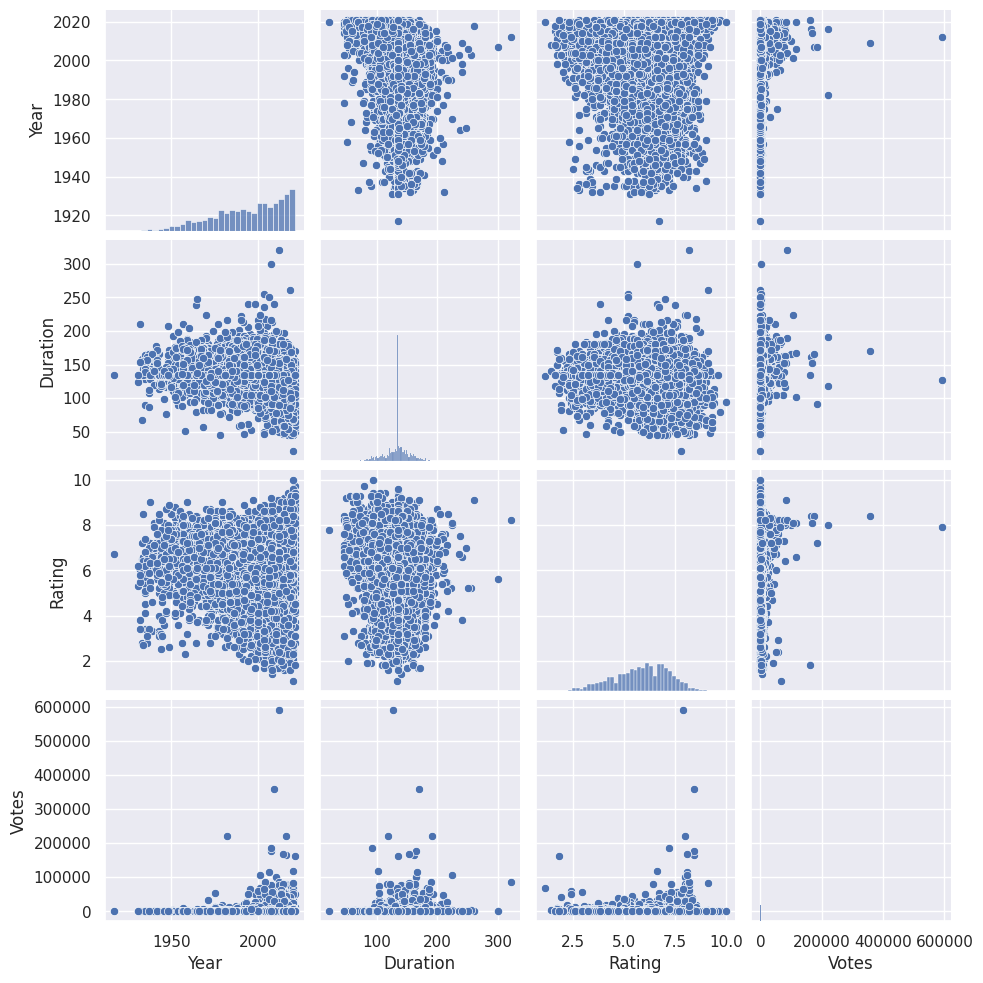

In [ ]:
sns.pairplot(filled_df)

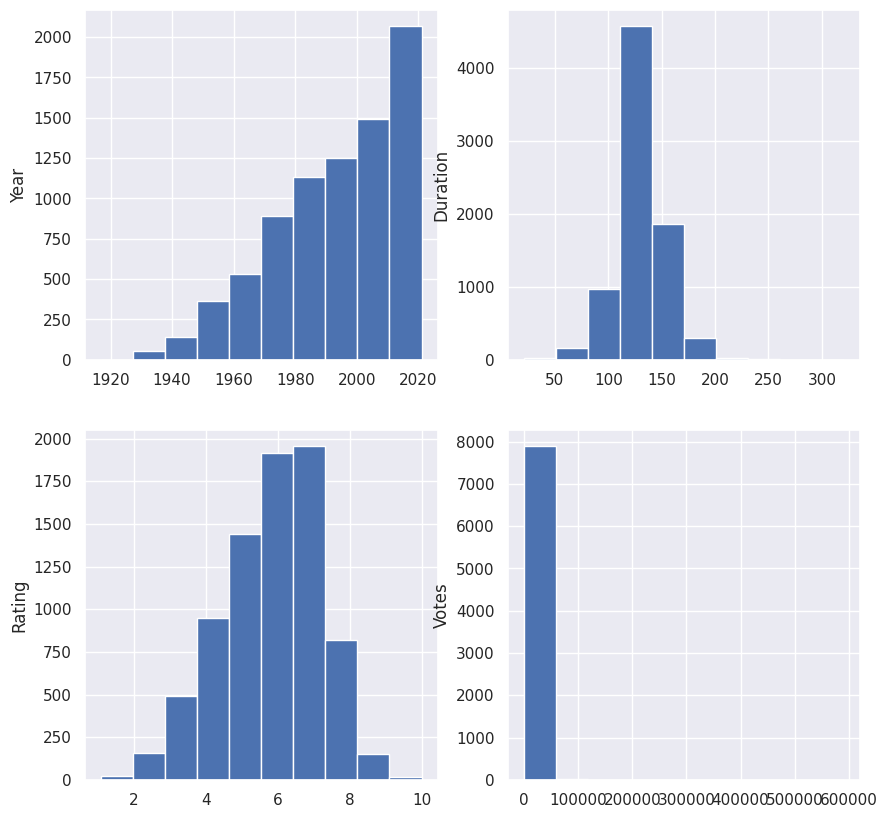

In [ ]:
col_index = 0

fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (10, 10))

for row_count in range(plt_rows):
    for col_count in range(plt_cols):
        ax[row_count][col_count].hist(filled_df[col_names[col_index]])
        ax[row_count][col_count].set_ylabel(col_names[col_index])
        col_index += 1

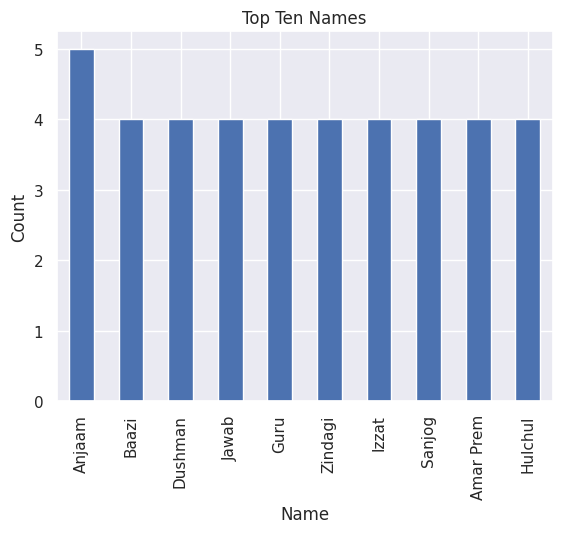

In [ ]:

def top_ten(col):
    filled_df[col].value_counts().sort_values(ascending = False)[:10].plot(kind = "bar")
    plt.title("Top Ten {}s".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

def word_map(col):
    text_data = ' '.join(filled_df[col])
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'black').generate(text_data)
    plt.figure(figsize = (10,5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
top_ten("Name")

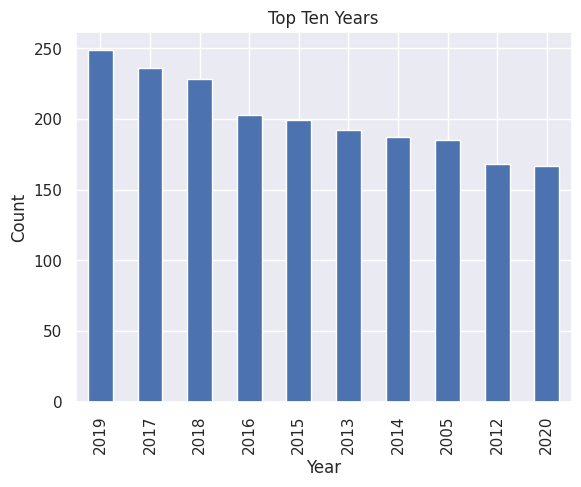

In [ ]:
top_ten("Year")

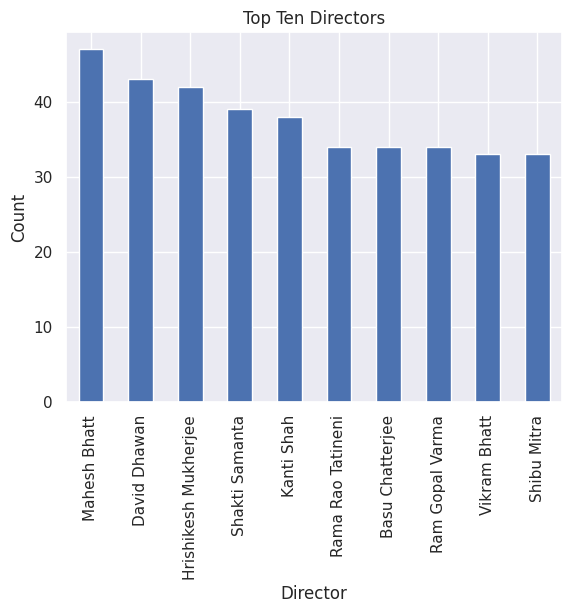

In [ ]:
top_ten("Director")

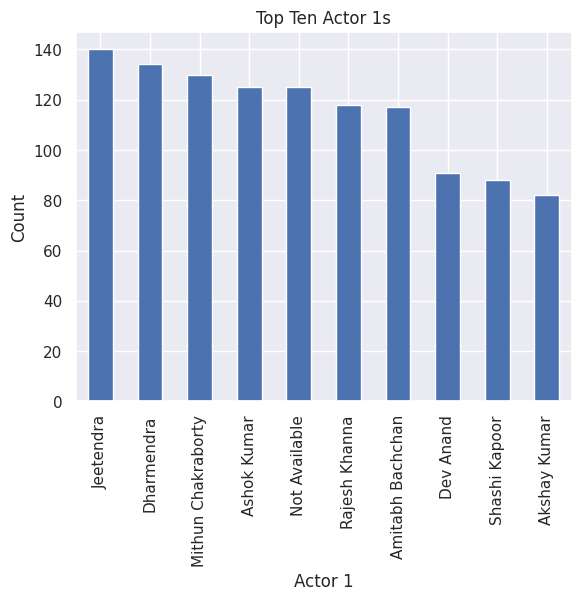

In [ ]:
top_ten("Actor 1")

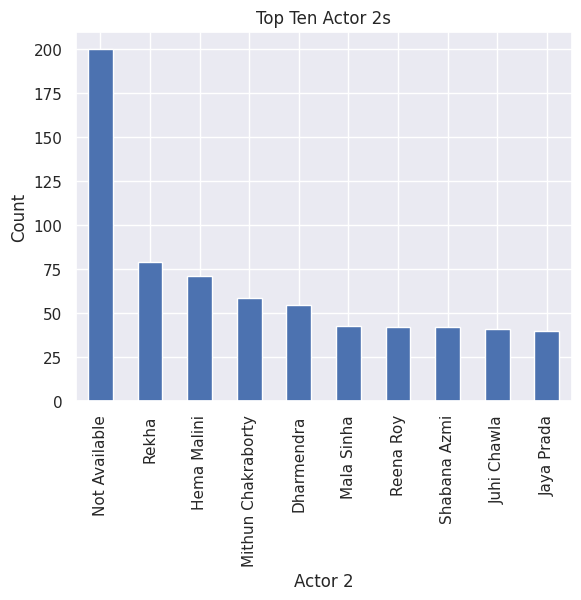

In [ ]:
top_ten("Actor 2")

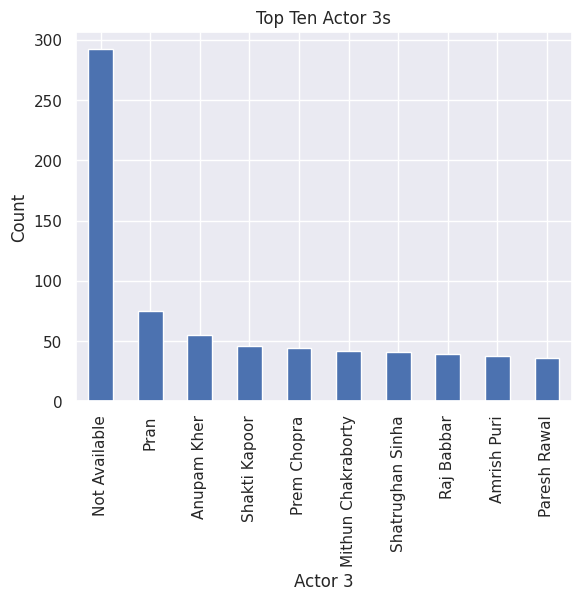

In [ ]:
top_ten("Actor 3")

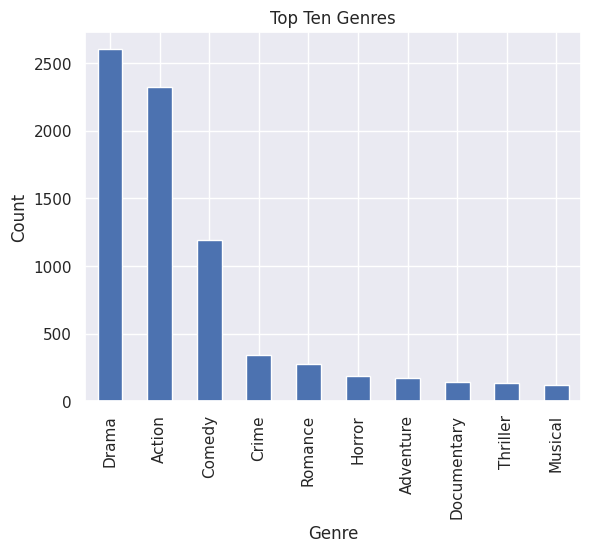

In [ ]:
top_ten("Genre")

In [ ]:
filled_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
3609,Des Pardes,1978,134.0,7.1,151,Dev Anand,Dev Anand,Ajit,Pran,Drama
11828,Rebellious Flower,2016,110.0,6.8,241,Krishan Hooda,Prince Shah,Shashank Singh,Mantra Mugdh,Biography


In [ ]:

def rating_per(col, color):
    avg_rating = filled_df.groupby(col)['Rating'].mean().reset_index()
    plt.figure(figsize = (10, 6))
    plt.bar(avg_rating[col], avg_rating['Rating'], color = color)
    plt.title('{}-wise Ratings'.format(col))
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

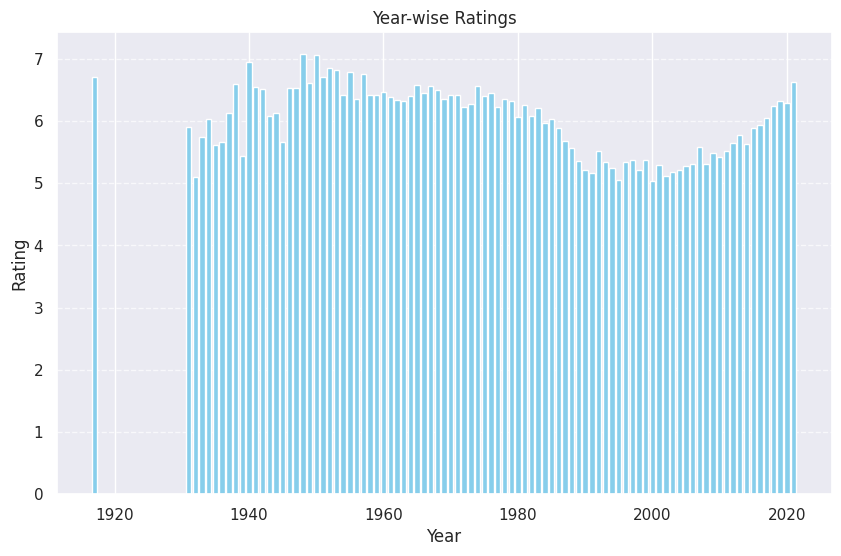

In [ ]:
rating_per('Year', 'skyblue')

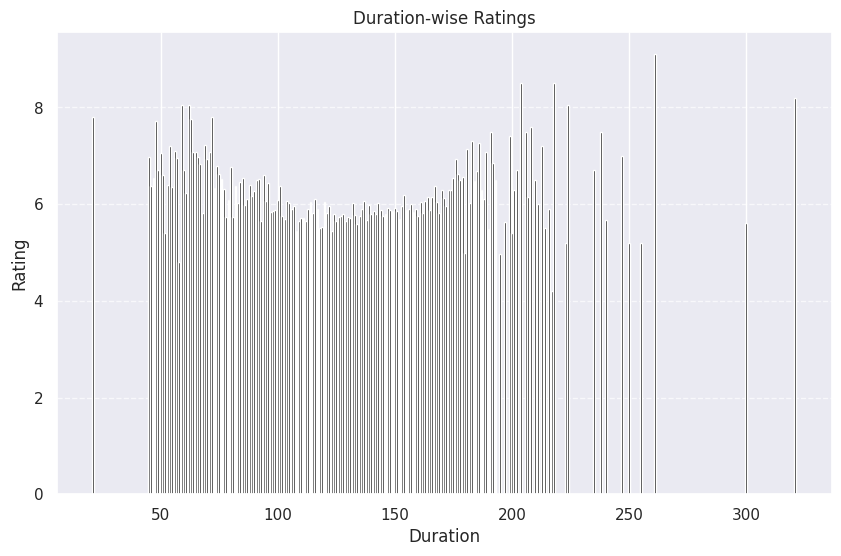

In [ ]:
rating_per('Duration', 'black')

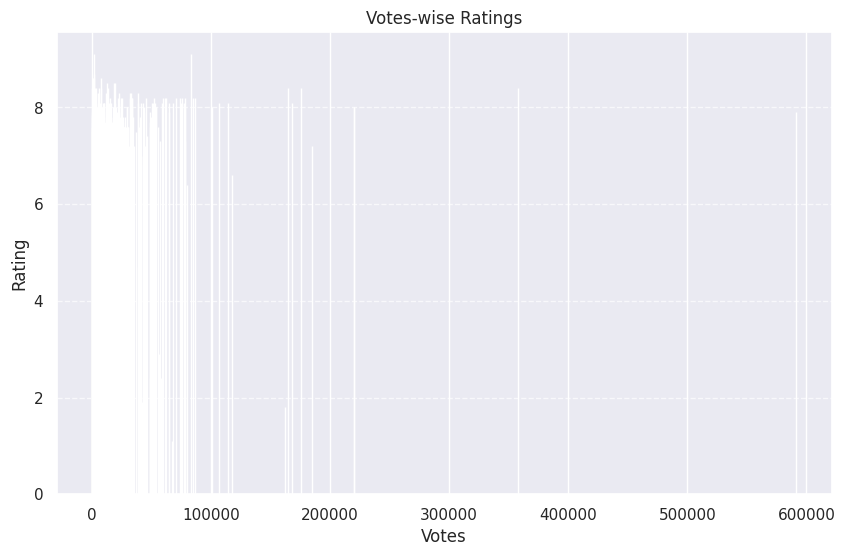

In [ ]:
rating_per('Votes', 'white')

In [ ]:
def top_rated(col):
    avg_rating = filled_df.groupby(col)['Rating'].mean().reset_index()
    top20 = avg_rating.sort_values(by='Rating', ascending=False).head(20)[col]
    top20_df = filled_df[filled_df[col].isin(top20)]
    sorted_top20_df = top20_df.sort_values(by = 'Rating', ascending = False)
    plt.figure(figsize = (12, 8))
    sns.violinplot(x = 'Rating', y = col, data = sorted_top20_df, palette = 'muted')
    plt.title('{}-wise Rating Distribution'.format(col))
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.show()

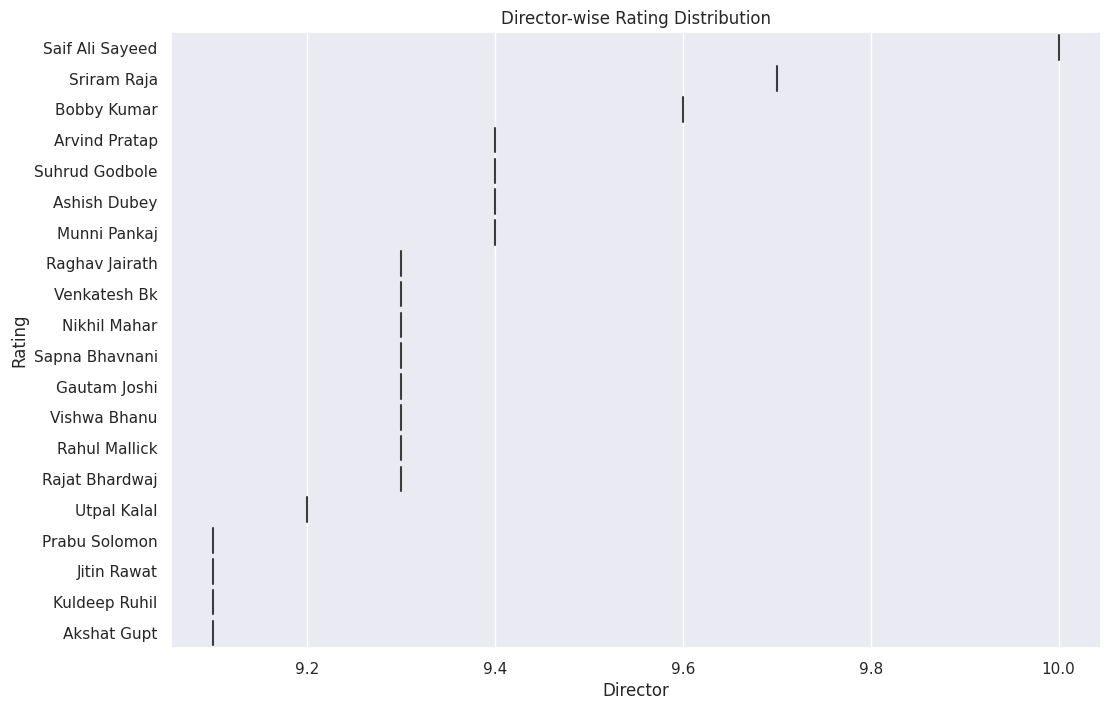

In [ ]:
top_rated('Director')

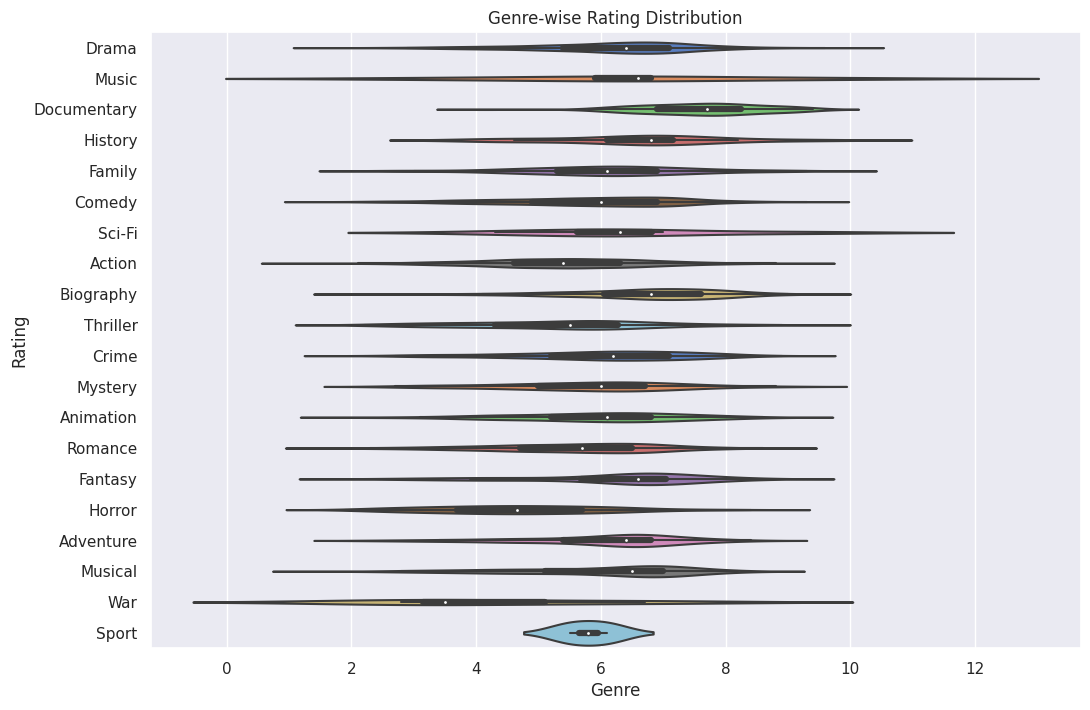

In [ ]:
top_rated('Genre')

In [ ]:
top_movies_overall = filled_df.nlargest(10, 'Rating')

# Find the top 10 movies per year
top_movies_per_year = filled_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)

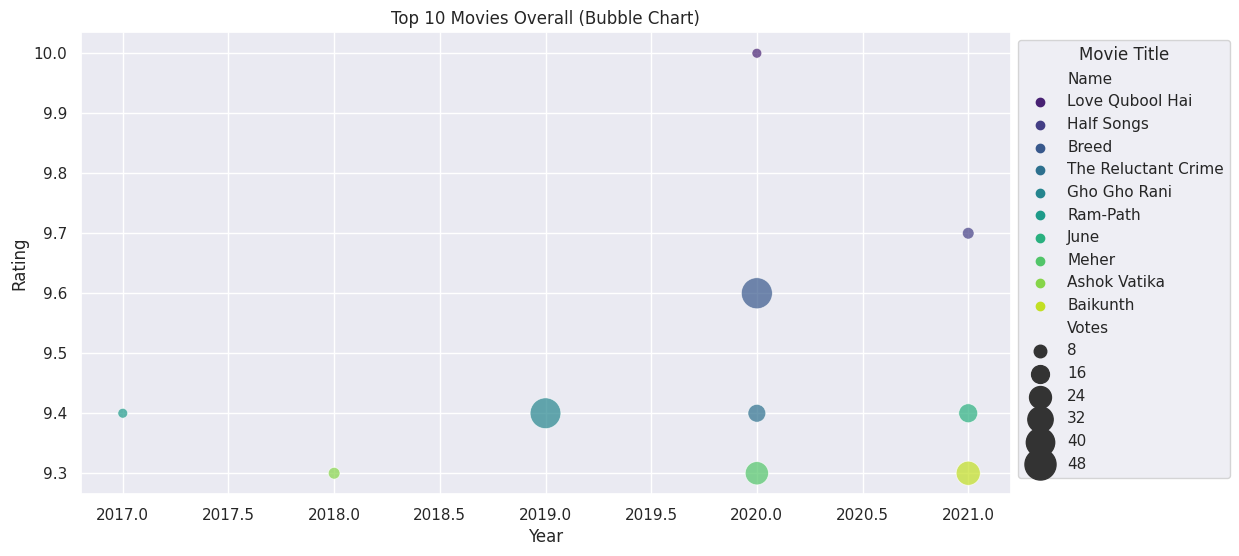

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'Year', y = 'Rating', size = 'Votes', data = top_movies_overall, hue = 'Name', sizes = (50, 500), palette = 'viridis', alpha = 0.7)
plt.title('Top 10 Movies Overall (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left', title = 'Movie Title')
plt.show()

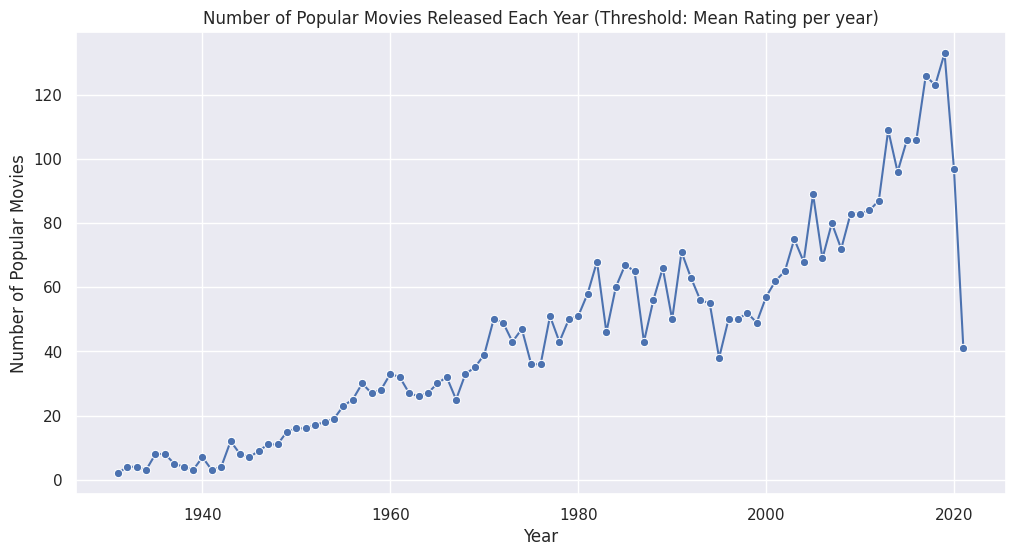

In [ ]:
mean_rating_per_year = filled_df.groupby('Year')['Rating'].mean().reset_index()

# Merge the mean popularity back into the original dataframe
mean_rated_df = pd.merge(filled_df, mean_rating_per_year, on = 'Year', suffixes=('', '_mean'))

# Use the mean popularity as the threshold
mean_rated_df['IsPopular_Rating'] = mean_rated_df['Rating'] > mean_rated_df['Rating_mean']

# Count the number of popular movies released each year
popular_rated_movies_count = mean_rated_df[mean_rated_df['IsPopular_Rating']].groupby('Year').size().reset_index(name = 'Number of Popular Movies (Rated)')

# Visualize the number of popular movies released each year using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Popular Movies (Rated)', data=popular_rated_movies_count, marker='o', color='b')
plt.title('Number of Popular Movies Released Each Year (Threshold: Mean Rating per year)')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.grid(True)
plt.show()

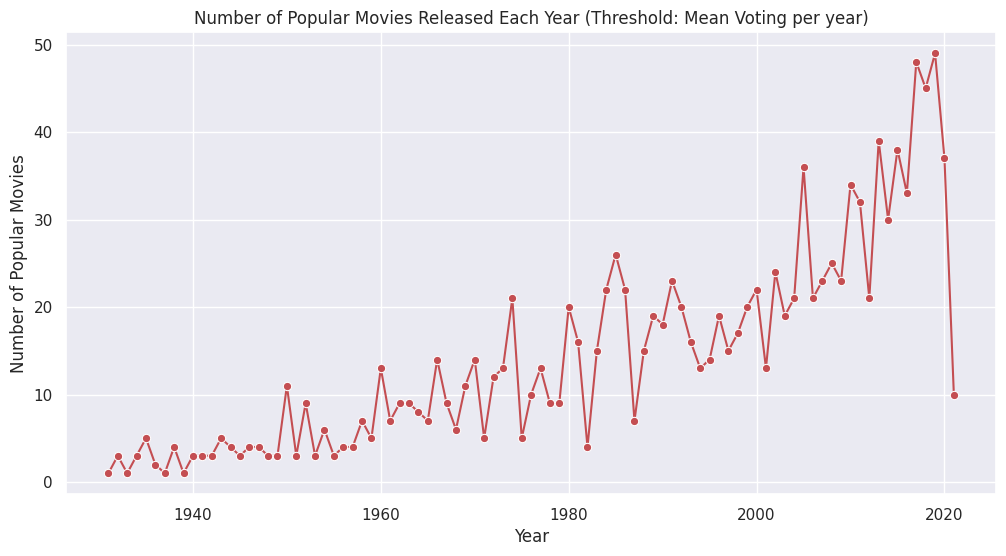

In [97]:
mean_votes_per_year = filled_df.groupby('Year')['Votes'].mean().reset_index()

# Merge the mean popularity back into the original dataframe
mean_voted_df = pd.merge(filled_df, mean_votes_per_year, on = 'Year', suffixes=('', '_mean'))

# Use the mean popularity as the threshold
mean_voted_df['IsPopular_Voting'] = mean_voted_df['Votes'] > mean_voted_df['Votes_mean']

# Count the number of popular movies released each year
popular_voted_movies_count = mean_voted_df[mean_voted_df['IsPopular_Voting']].groupby('Year').size().reset_index(name = 'Number of Popular Movies (Voted)')

# Visualize the number of popular movies released each year using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Popular Movies (Voted)', data=popular_voted_movies_count, marker='o', color='r')
plt.title('Number of Popular Movies Released Each Year (Threshold: Mean Voting per year)')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.grid(True)
plt.show()

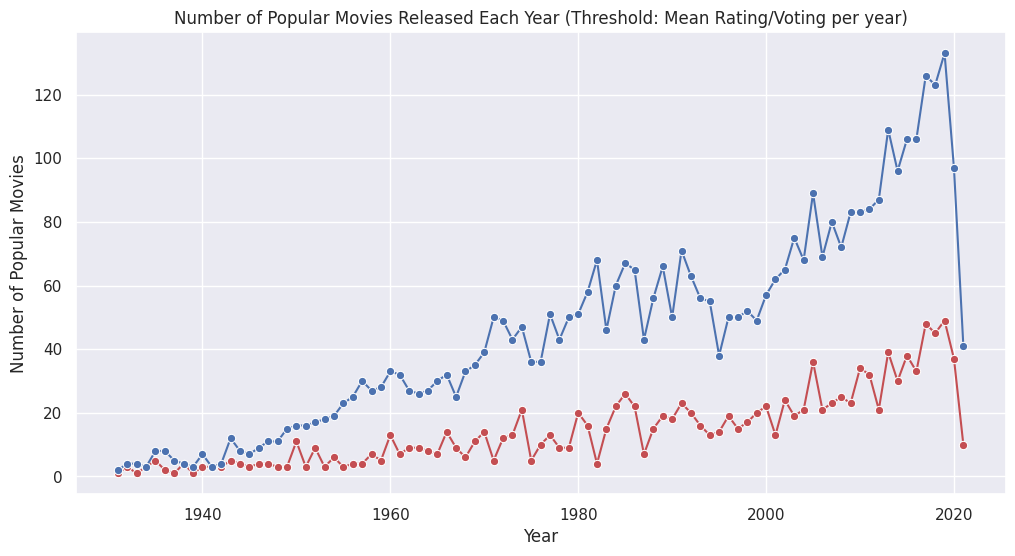

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Popular Movies (Voted)', data=popular_voted_movies_count, marker='o', color='r')
sns.lineplot(x='Year', y='Number of Popular Movies (Rated)', data=popular_rated_movies_count, marker='o', color='b')
plt.title('Number of Popular Movies Released Each Year (Threshold: Mean Rating/Voting per year)')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.grid(True)
plt.show()

In [100]:
max_rating_per_year = filled_df.groupby('Year')['Rating'].max().reset_index()

# Merge the maximum rating back into the original dataframe
max_rated_df = pd.merge(filled_df, max_rating_per_year, on='Year', suffixes=('', '_max'))

# Count the number of votes for movies that performed better in rating each year
better_movies_votes_per_year = max_rated_df[max_rated_df['Rating'] == max_rated_df['Rating_max']].groupby('Year')['Votes'].sum().reset_index(name = 'Total Votes').sort_values(by = 'Year')

# Count the number of votes for movies that performed better in rating overall
better_movies_votes_overall = max_rated_df[max_rated_df['Rating'] == max_rated_df['Rating_max']].groupby('Name')['Votes'].sum().reset_index(name = 'Total Votes').sort_values(by = 'Total Votes', ascending = False)


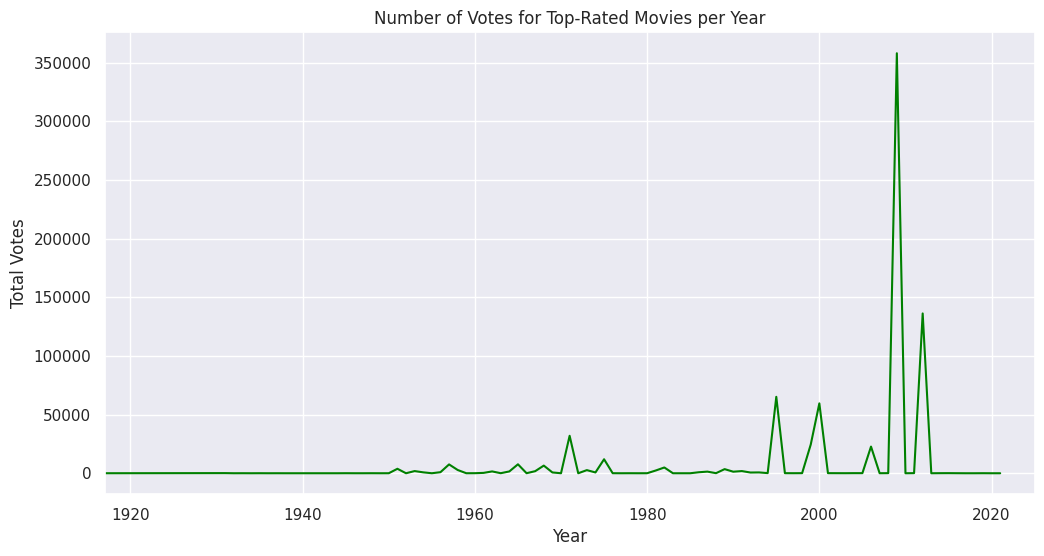

In [101]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Year', y = 'Total Votes', data = better_movies_votes_per_year, color = 'green')
plt.title('Number of Votes for Top-Rated Movies per Year')
plt.ylabel('Total Votes')
plt.xlabel('Year')
plt.xlim(left = min(filled_df['Year']), right = 2025)
plt.show()

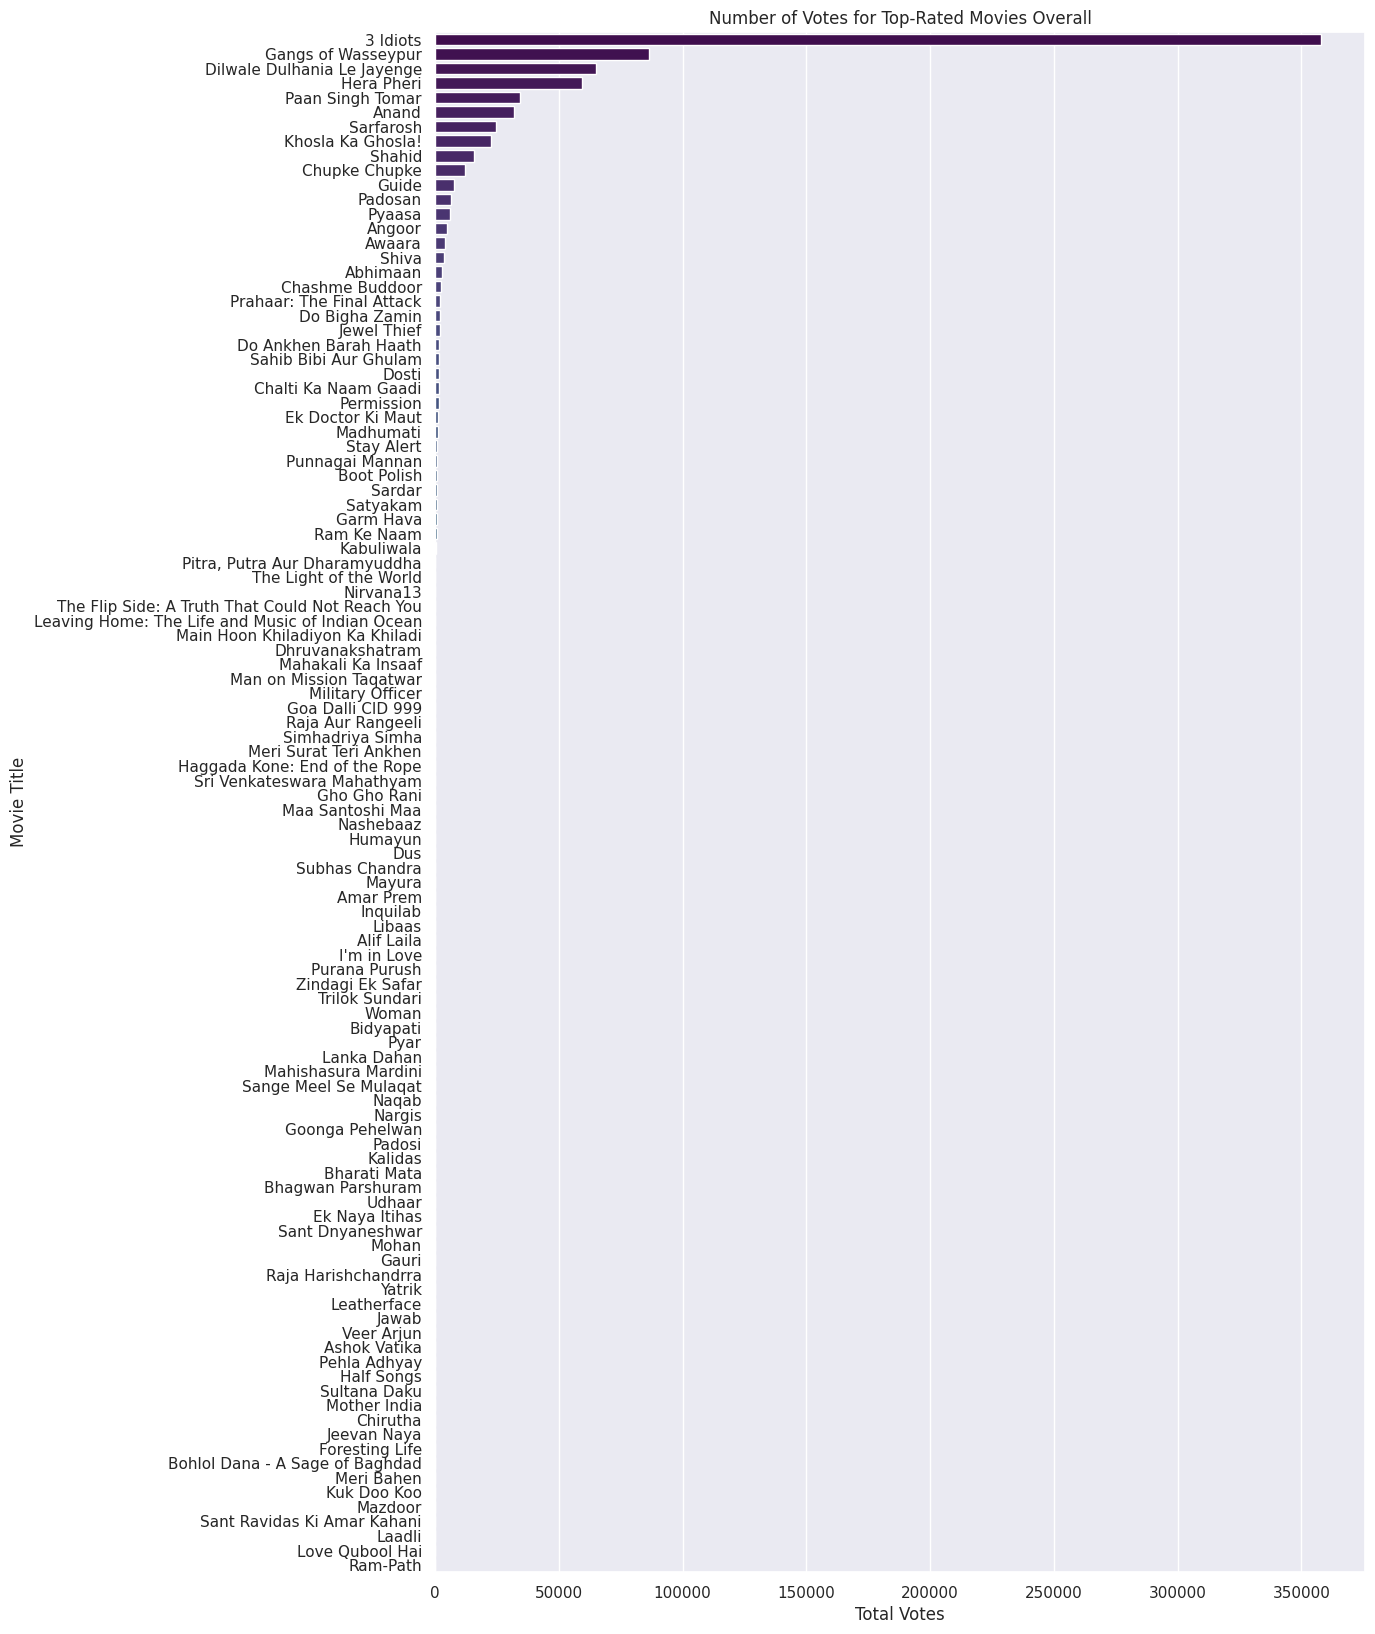

In [102]:
plt.figure(figsize = (12, 20))
sns.barplot(y = 'Name', x = 'Total Votes', data = better_movies_votes_overall, palette = 'viridis')
plt.title('Number of Votes for Top-Rated Movies Overall')
plt.ylabel('Movie Title')
plt.xlabel('Total Votes')
plt.show()